## Author: Ran Meng

This jupyter notebook contains my work for certification of "Survival Analysis in Python" instructed by Shae Wang, from [DataCamp]('https://app.datacamp.com/learn/courses/survival-analysis-in-python')

In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
# from lifelines import KaplanMeierFitter, WeibullFitter, WeibullAFTFitter,  CoxPHFitter
# from lifelines.statistics import logrank_test
# from lifelines.plotting import qq_plot

## Introduction to Survival Analysis

#### Preprocess censored data

You are a marine-biologist studying the lifespan of spinner dolphins. You have access to historical data detailing their birth and death dates. Some tagged dolphins migrated to a different part of the water and the lab lost track of them. Some dolphins are migrants from a different pod, and their exact birth dates are unknown. Some dolphins are still alive!

If the birth date is NaN, the dolphin is a migrant.
If the death date is NaN, the dolphin either ran away or is alive.
The DataFrame is called dolphin_df. To create a new column called observed to flag if a dolphin's lifetime is censored, fill out the function check_observed with appropriate values and use .apply() to apply the function to dolphin_df.

In [ ]:
# Create a function to return 1 if observed 0 otherwise
def check_observed(row):
    if pd.isna(row['birth_date']):
        flag = 0
    elif pd.isna(row['death_date']):
        flag = 0
    else:
        flag = 1
    return flag
  
# Create a censorship flag column
dolphin_df['observed'] = dolphin_df.apply(check_observed, axis=1)

# Print average of observed
print(np.average(dolphin_df['observed'] )) # 0.8566666666666667

#### First look at censored data

You are the lead data scientist at the national government of a small country named Data Land. You are helping write the law on how long presidencies should last. Because your country relies on data for every decision, you seek wisdom from a DataFrame of 1808 regimes across 202 countries, called regime_durations. How long do regimes tend to last? The fate of your country lies between the rows and in your hands…

Your goal is to calculate the average duration. Because you are using a time-to-event dataset, you will need to inspect the data to check for censorship.

In [3]:
regime_durations = pd.read_csv('regimes.csv')

regime_durations.head(5)

,ctryname,cowcode2,politycode,un_region_name,un_continent_name,ehead,leaderspellreg,democracy,regime,start_year,duration,observed
0,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1946.1952.Mona...,Non-democracy,Monarchy,1946,7,1
1,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1953.1962.Ci...,Non-democracy,Civilian Dict,1953,10,1
2,Afghanistan,700,700.0,Southern Asia,Asia,Mohammad Zahir Shah,Mohammad Zahir Shah.Afghanistan.1963.1972.Mona...,Non-democracy,Monarchy,1963,10,1
3,Afghanistan,700,700.0,Southern Asia,Asia,Sardar Mohammad Daoud,Sardar Mohammad Daoud.Afghanistan.1973.1977.Ci...,Non-democracy,Civilian Dict,1973,5,0
4,Afghanistan,700,700.0,Southern Asia,Asia,Nur Mohammad Taraki,Nur Mohammad Taraki.Afghanistan.1978.1978.Civi...,Non-democracy,Civilian Dict,1978,1,0


In [4]:
print(regime_durations.shape)

(1808, 12)


In [6]:
# Count censored data
count = len(regime_durations[regime_durations['observed'] == 0])

# Print the count to console
print(count)

# Correct! Given 340 regime durations (about 18% of your data) are censored, you may use survival analysis to handle the data.

340


### Draw a survival curve

You are a sociologist studying how convicts behave after their release. The DataFrame prison contains the information from 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up with one year after release. There are two main columns of interest:

week: the number of weeks elapsed since release
arrest: whether the convict has been re-arrested within one year after release
A Kaplan Meier survival function has been fitted for you and the model object is called prison_kmf. Can you visualize the survival curve of prison_kmf?

In [15]:
prison = pd.read_csv('prison.csv')

prison.head()

,Unnamed: 0,week,arrest,fin,age,race,wexp,mar,paro,prio
0,0,20,1,0,27,1,0,0,1,3
1,1,17,1,0,18,1,0,0,1,8
2,2,25,1,0,19,0,1,0,1,13
3,3,52,0,1,23,1,1,1,1,1
4,4,52,0,0,19,0,1,0,1,3


In [8]:
print(prison.shape)

(432, 10)


In [ ]:
# Plot the survival function
prison_kmf.plot_survival_function()

# Show the plot
plt.show() # An ex-convit is re-arrested within 30 weeks with 14% probability

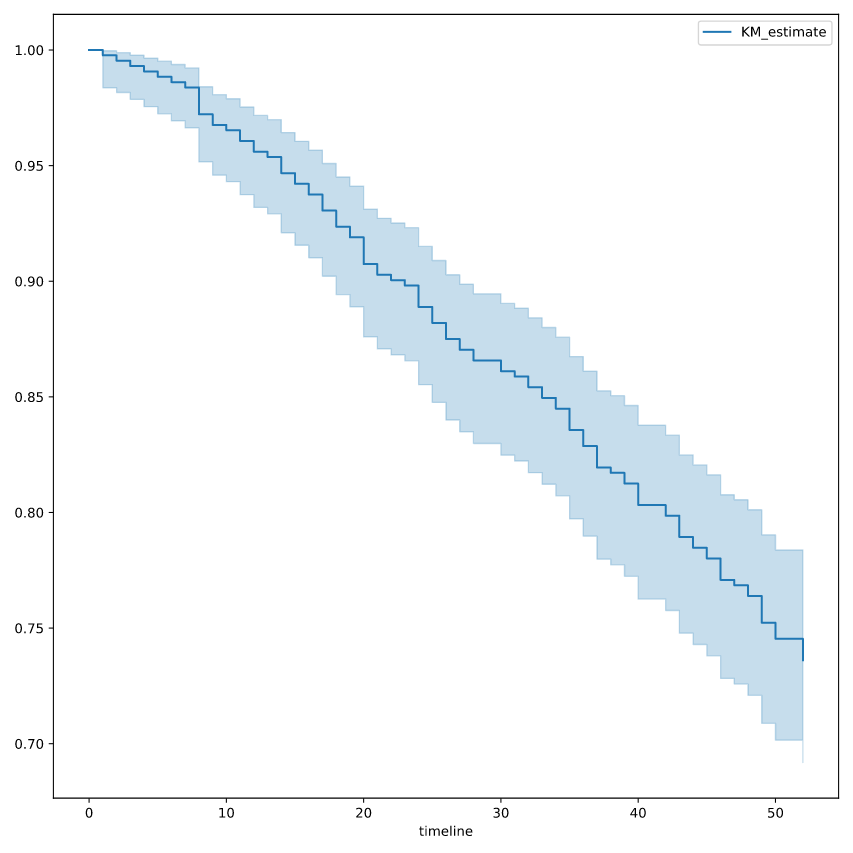

#### Long live democracy!

Earlier in the chapter, we explored and confirmed the data censorship issue for the regime durations dataset. Now, it is time to build your first survival curve for estimating average duration.

Your job is to estimate a survival function and plot a survival curve to show the survival probabilities. To estimate the survival function, you will create an instance of the *KaplanMeierFitter* object and fit it to the appropriate data columns. The parameter names have been provided for you as you will learn more about fitting survival functions in later chapters.


In [ ]:
kmf = KaplanMeierFitter()

# Fit the KaplanMeierFitter object to the data
kmf.fit(durations=regime_durations['duration'], 
        event_observed=regime_durations['observed'])

# Visualize and show the survival curve
kmf.plot_survival_function()
plt.show() # 4 years median duration

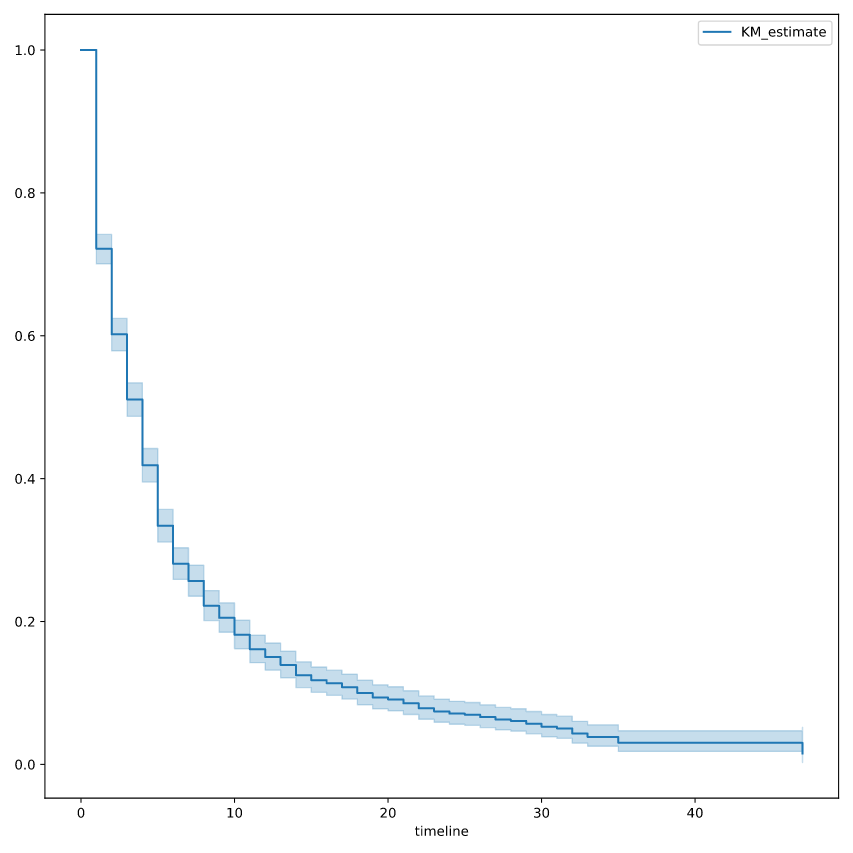

## Survival Curve Estimation

#### Heart disease patient survival

You're a data scientist at a clinical research organization that studies heart diseases. You wonder if pericardial effusion, fluid build-up around the heart, affects heart attack patients' survival outcomes. In this exercise, you will explore how to use two statistical methods to compare survival distributions from patients with and without pericardial effusion.

In [18]:
heart_patients = pd.read_csv('echocardiogram.csv')

heart_patients.head()

,survival,alive,age,pericardialeffusion,fractionalshortening,epss,lvdd,wallmotion-score,wallmotion-index,mult,name,group,aliveat1
0,11.0,0.0,71.0,0.0,0.260,9.000,4.600,14.0,1.00,1.000,name,1,0.0
1,19.0,0.0,72.0,0.0,0.380,6.000,4.100,14.0,1.70,0.588,name,1,0.0
2,16.0,0.0,55.0,0.0,0.260,4.000,3.420,14.0,1.00,1.000,name,1,0.0
3,57.0,0.0,60.0,0.0,0.253,12.062,4.603,16.0,1.45,0.788,name,1,0.0
4,19.0,1.0,57.0,0.0,0.160,22.000,5.750,18.0,2.25,0.571,name,1,0.0


In [19]:
heart_patients.shape

(133, 13)

In [20]:
has_pericardial_effusion = heart_patients[heart_patients['pericardialeffusion'] == 1]
print(has_pericardial_effusion.shape)

none_pericardial_effusion = heart_patients[heart_patients['pericardialeffusion'] == 0]
print(none_pericardial_effusion.shape)

(24, 13)
(107, 13)


In [ ]:
# Instantiate Kaplan Meier object for patients with and without pericardial effusion
kmf_has_pe = KaplanMeierFitter()
kmf_no_pe = KaplanMeierFitter()

# Fit Kaplan Meier estimators to each DataFrame
kmf_has_pe.fit(durations=has_pericardial_effusion['survival'], 
          event_observed=has_pericardial_effusion['observed'])
kmf_no_pe.fit(durations=none_pericardial_effusion['survival'], 
          event_observed=none_pericardial_effusion['observed'])

In [ ]:
# Print out the median survival duration of each group
print("The median survival duration (months) of patients with pericardial effusion: ", kmf_has_pe.median_survival_time_) # 27.0
print("The median survival duration (months) of patients without pericardial effusion: ", kmf_no_pe.median_survival_time_) # 31.0

In [5]:
'''Patients without periardial effusion have a longer survival time'''

'Patients without periardial effusion have a longer survival time'

#### Plotting the survival curve

You learned that there are different ways to plot the survival function from the Kaplan-Meier estimator. A survival function on the term lengths of Canadian senators has been fitted for you using KaplanMeierFitter and the instance is called senator_kmf. Try plotting senator_kmf in the console. After each plot, you may run plt.clf() to clear the figure.

In [ ]:
senator_kmf.plot_survival_function()

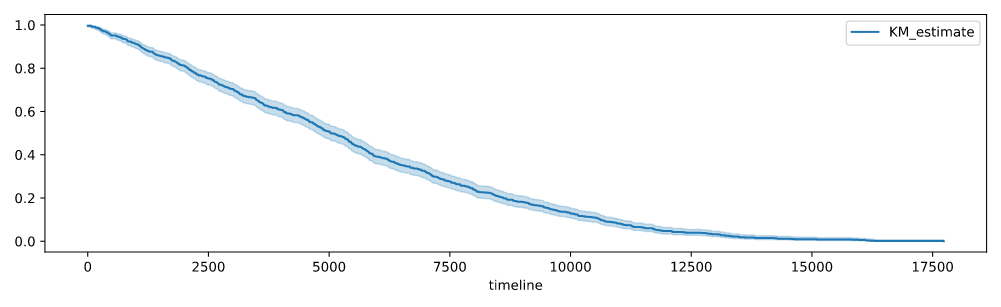

In [ ]:
senator_kmf.survival_function_.plot()

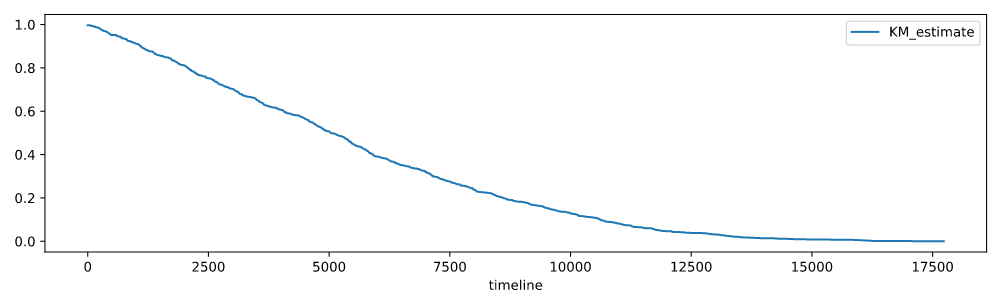

In [ ]:
senator_kmf.plot()

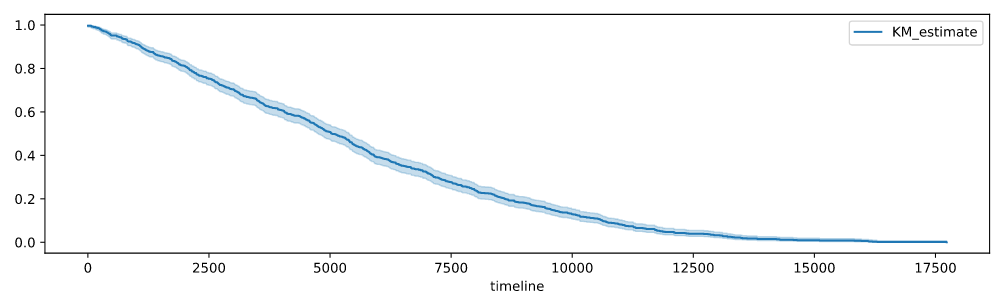

#### Patient soreness treatment

You are studying a treatment for muscle soreness recurrence in patients. You want to use the Kaplan-Meier estimator to visualize the rate at which patients receiving the treatment encounter soreness episodes.

The DataFrame is called *recur* and contains columns

age: the age of the patient;

time_0: the time that the patient received the treatment;

time_1: the last time of an event, or the last time you measured a censored patient;

censor: whether the event is censored;

In [ ]:
# Calculate duration
recur['duration'] = recur['time_1'] - recur['time_0']

# Instantiate and fit KaplanMeierFitter
kmf = KaplanMeierFitter()
kmf.fit(recur['duration'], recur['censor'])

# Plot survival function with CI
kmf.plot_survival_function()

# Display figure
plt.show()

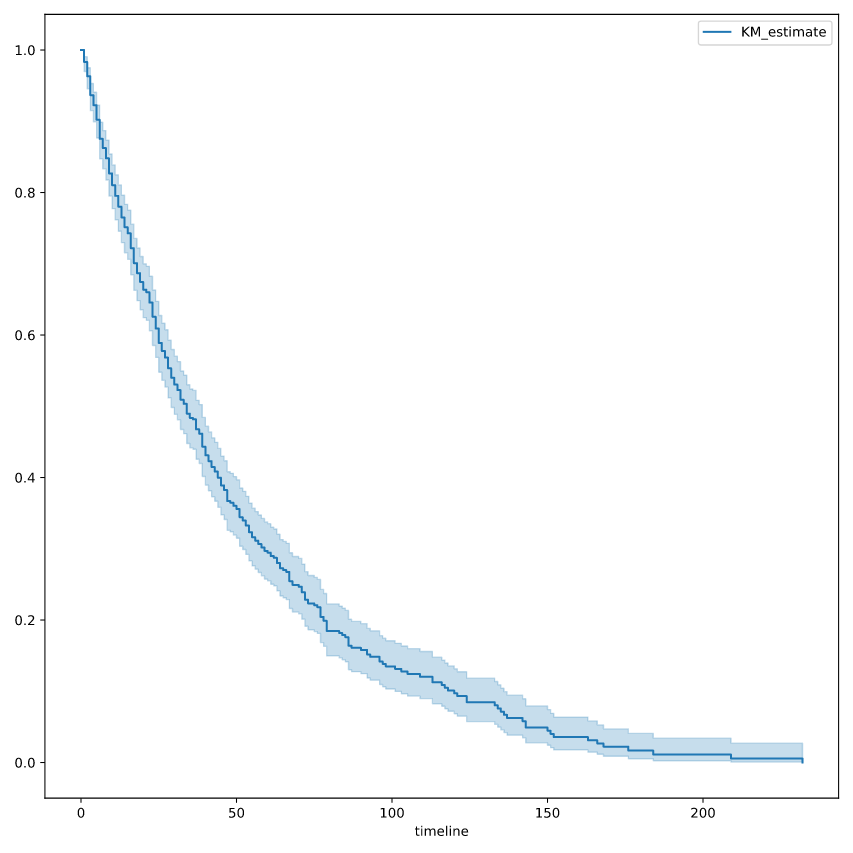

In [3]:
'''The confidence interval gets wider because there are fewer patients at risk'''

'The confidence interval gets wider because there are fewer patients at risk'

In [4]:
'''Soreness is more likely to occur to at-risk patients within the first 50 hours of treatment than after 50 hours'''

'Soreness is more likely to occur to at-risk patients within the first 50 hours of treatment than after 50 hours'

#### Senators' terms in office

You want to compare if senators from Quebec tend to serve a different term length than those from British Columbia. One simple method is to plot their Kaplan-Meier survival functions on the same graph.

The DataFrame containing British Columbia senator term durations information is called *bc_df*. It contains columns

name: the name the of senator

diff_days: the duration of the senator in office

observed: whether the end of the term is observed (1 or 0)

The survival curve of Quebec senators has been plotted on a pyplot object called *senator_fig*, and a KaplanMeierFitter instance called *kmf* has been created.

In [ ]:
# Fit Kaplan-Meier estimator
kmf.fit(bc_df['diff_days'], bc_df['observed'], label='British Columbia')

# Plot survival function on senator_fig
kmf.plot(ax = senator_fig)

# Display the figure
plt.show()

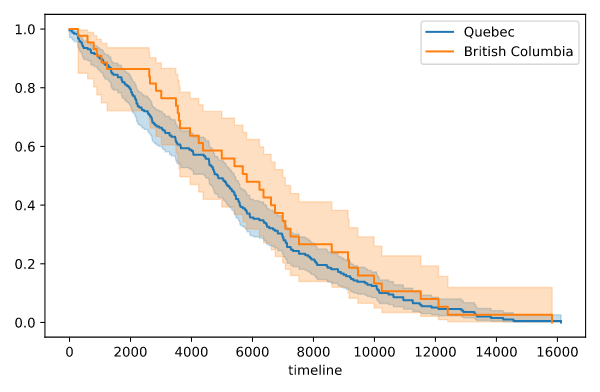

#### Comparing patient soreness treatments

There is an experiment for a new soreness treatment, and you want to compare patients that received the new treatment versus the old one. You will fit a Kaplan-Meier estimator to each set of patient data and visualize their survival curves side-by-side.

The DataFrame is called *recur* and contains columns

age: the age of the patient;

treat: the treatment that the patient received (0 if new, 1 if old);

duration: the duration post treatment in hours;

censor: whether the event is censored;

In [ ]:
# Mask for new treatment
new = (recur['treat']== 0)

# Fit to new treatment and plot survival function
kmf.fit(recur[new]['duration'], recur[new]['censor'], label='New treatment')
kmf.plot_survival_function(ax = ax)

# Fit to old treatment and plot survival function
kmf.fit(recur[~new]['duration'], recur[~new]['censor'], label='Old treatment')
kmf.plot_survival_function(ax = ax)

# Display figure
plt.show()

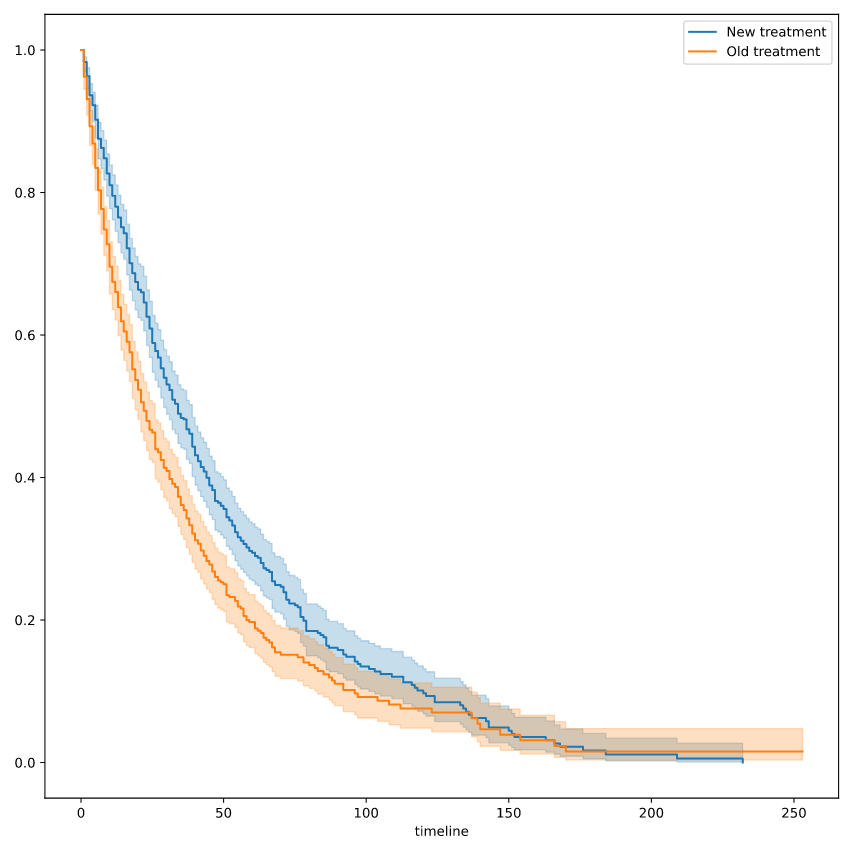

In [6]:
'''We cannot tell whether if there are differences in likelihood to experience soreness 100 hours after treatment among at-risk patients. Because the confidence intervals overlap, we need more formal hypothesis testing or regression-based methods to make a conclusion.'''

'We cannot tell whether if there are differences in likelihood to experience soreness 100 hours after treatment among at-risk patients. Because the confidence intervals overlap, we need more formal hypothesis testing or regression-based methods to make a conclusion.'

#### Plotting and comparing survival curves

Back at the heart clinic, you want to present some visualizations that showcase the differences in patient survival times to the Head of Research. You will plot the survival curves of patients with and without pericardial effusion side-by-side.

A KaplanMeierFitter object kmf is instantiated. DataFrames for patients with and without pericardial effusion are loaded and stored as has_pericardial_effusion and none_pericardial_effusion, respectively.

In [ ]:
# Fit kmf to patients with pericardial effusion
kmf.fit(has_pericardial_effusion['survival'], has_pericardial_effusion['observed'], label='has_pericardial_effusion')

# Create a plot of the survival function
surv_plot = kmf.plot()

In [ ]:
# Fit kmf to patients without pericardial effusion
kmf.fit(none_pericardial_effusion['survival'], none_pericardial_effusion['observed'], label='no_pericardial_effusion')

# Plot new survival function and show plot
kmf.plot(ax=surv_plot)
plt.show()

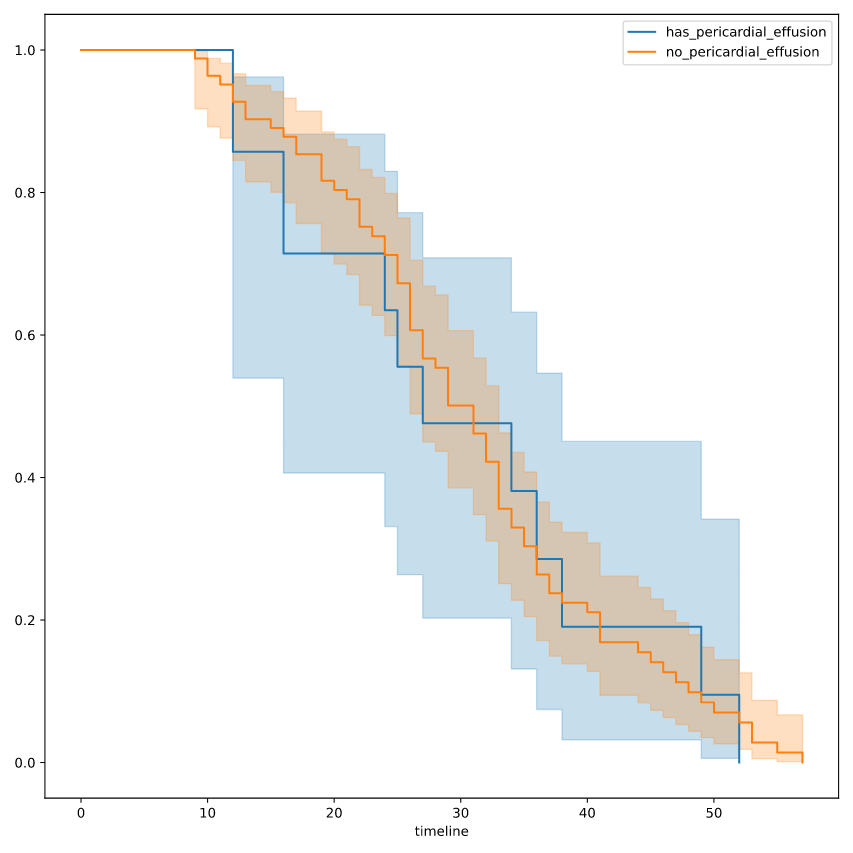

In [7]:
'''Notice that the survival curves look very similar, so you will need to do some formal hypothesis testing to look into this further.'''

'Notice that the survival curves look very similar, so you will need to do some formal hypothesis testing to look into this further.'

#### Log-rank test

After comparing the median survival times of patients with and without pericardial effusion, you also inspected their survival curves visually. To your surprise, the curves actually seem quite similar to each other. Before you finalize your conclusion, it's important to scientifically test this hypothesis. You will use the log-rank test and inspect the p-value to make a decision.

The pandas package is loaded as pd. DataFrames for patients with and without pericardial effusion are loaded and stored as has_pericardial_effusion and none_pericardial_effusion, respectively.

In [ ]:
# Run log-rank test to compare patients with and without pericardial effusion
patient_results = logrank_test(has_pericardial_effusion['survival'], none_pericardial_effusion['survival'], has_pericardial_effusion['observed'], none_pericardial_effusion['observed'])

In [ ]:
# Print out the p-value of log-rank test results
print(patient_results.p_value) # 0.890495240509155

## The Weibull Model

#### Model prison data with Weibull

You are a sociologist studying the time it takes for convicts to be rearrested after their release. The DataFrame prison contains information from 432 convicts who were released from Maryland state prisons in the 1970s and who were followed up with one year after release.

You will model the survival function of time-to-arrest using the Weibull model.

In [16]:
prison.head()

,Unnamed: 0,week,arrest,fin,age,race,wexp,mar,paro,prio
0,0,20,1,0,27,1,0,0,1,3
1,1,17,1,0,18,1,0,0,1,8
2,2,25,1,0,19,0,1,0,1,13
3,3,52,0,1,23,1,1,1,1,1
4,4,52,0,0,19,0,1,0,1,3


In [ ]:
# Instantiate WeibullFitter class wb
wb = WeibullFitter()

# Fit data to wb
wb.fit(prison['week'], prison['arrest'])

# Plot survival function
wb.survival_function_.plot()
plt.show()

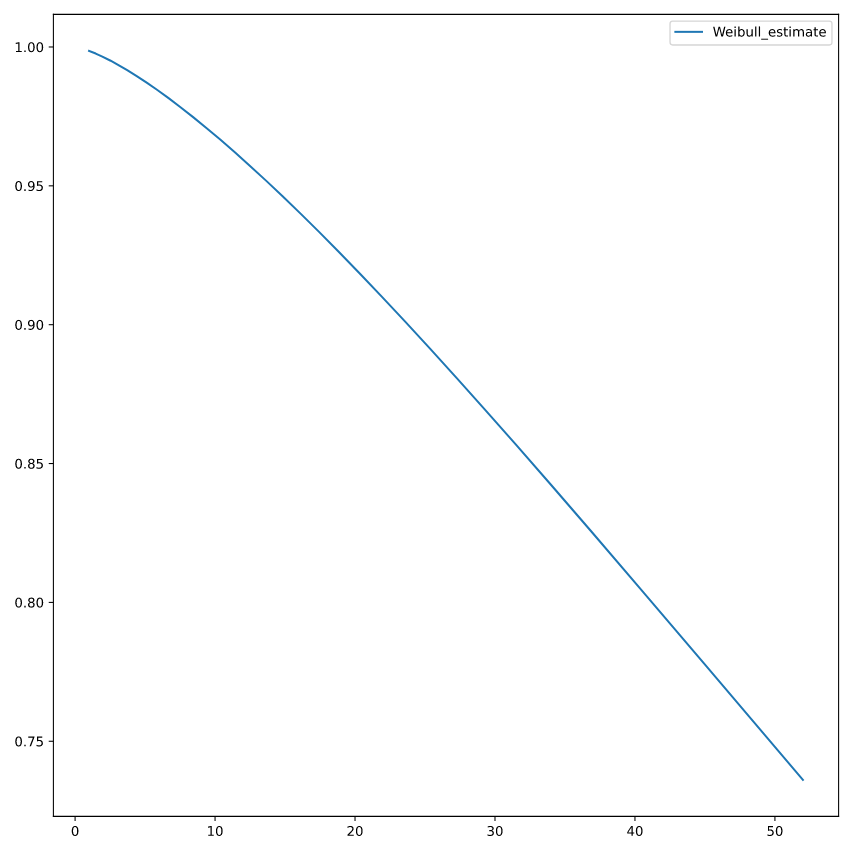

In [ ]:
wb.summary

             coef  se(coef)      coef lower 95%  coef upper 95%  cmp to      z          p      -log2(p)
lambda_  123.677    13.342          97.528         149.826        1.0      9.195   3.751e-20    64.531
rho_       1.365     0.123           1.124           1.607        1.0      2.964   3.036e-03     8.364

#### Compare Weibull model parameters

Some convicts in the study were released on parole. Because parolees experience stricter restrictions, you suspect that their initial arrest rate is high but decreases as time goes on, while other convicts' arrest rate increases as time goes on.

You will fit a Weibull estimator to parolees and non-parolees separately. You will then compare their model parameters to verify your hypothesis. The DataFrame you will use is called prison.

In [ ]:
# Mask for parole
parole = (prison['paro'] == 1)

# Fit to parolee data
wb = WeibullFitter()
wb.fit(prison[parole]['week'], prison[parole]['arrest'])

# Print rho
print("The rho_ parameter of parolee survival function is: ", wb.rho_) # 1.4181024400796285

In [ ]:
# Fit to non parolee
wb.fit(durations=prison[~parole]['week'], event_observed=prison[~parole]['arrest'])

# Print rho
print("The rho_ parameter of non-parolee survival function is: ", wb.rho_) # 1.2943809760486589

In [17]:
'''Since rho > 1 for both groups, it indicates that both populations' rate of event increases as time goes on. '''

"Since rho > 1 for both groups, it indicates that both populations' rate of event increases as time goes on. "

#### Analyze heart patients characteristics

You want to understand how different characteristics of the heart change patients' survival outcomes. If you can identify warning signs, maybe you can apply treatments and increase patients' chances of survival!

You will regress patient characteristics against their survival durations using Weibull accelerated failure time (AFT) model.

In [ ]:
aft = WeibullAFTFitter()

# Fit heart_patients data into aft
aft.fit(heart_patients, duration_col = 'survival', event_col = 'observed')

# Print the summary
print(aft.summary)

In [ ]:
                                 coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  ...  exp(coef) upper 95%  cmp to      z          p  -log2(p)
    param   covariate                                                                         ...                                                         
    lambda_ age                   0.004      1.004     0.008          -0.012           0.021  ...                1.021     0.0  0.484  6.282e-01     0.671
            epss                 -0.022      0.978     0.018          -0.058           0.014  ...                1.014     0.0 -1.215  2.243e-01     2.156
            fractionalshortening -0.120      0.887     0.710          -1.511           1.271  ...                3.565     0.0 -0.169  8.658e-01     0.208
            lvdd                  0.066      1.068     0.110          -0.150           0.281  ...                1.324     0.0  0.596  5.509e-01     0.860
            pericardialeffusion   0.026      1.026     0.186          -0.338           0.389  ...                1.476     0.0  0.138  8.902e-01     0.168
            wallmotion-index      0.131      1.140     0.316          -0.488           0.750  ...                2.116     0.0  0.415  6.780e-01     0.561
            wallmotion-score     -0.010      0.990     0.028          -0.064           0.045  ...                1.046     0.0 -0.358  7.207e-01     0.473
            Intercept             3.281     26.592     0.870           1.575           4.986  ...              146.407     0.0  3.769  1.636e-04    12.578
    rho_    Intercept             0.928      2.530     0.126           0.682           1.175  ...                3.237     0.0  7.389  1.480e-13    42.620
    

In [ ]:
# Calculate the exponential of EPSS coefficient
exp_epss = np.exp(aft.params_.loc['lambda_'].loc['epss'])
print('When EPSS increases by 1, the average survival duration changes by a factor of ', exp_epss)

# When EPSS increases by 1, the average survival duration changes by a factor of  0.9781286998367273

#### Explore gender-LVDD interaction

You wonder if the survival risk for heart patients with LVDD (Left Ventricular Diastolic Dysfunction) is higher or lower among female patients. A good way to analyze this is with an interaction term between gender_f (1 if the subject is female, 0 otherwise) and lvdd.

You are going to fit the Weibull AFT model with gender_f*lvdd and interpret their coefficients. The DataFrame you will use is called heart_patients.

In [ ]:
# Fit custom model
aft.fit(heart_patients, duration_col = 'survival', event_col = 'observed', formula = 'epss + gender_f * lvdd')

# Print model summary
print(aft.summary)

In [ ]:
                        coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  ...  exp(coef) upper 95%  cmp to      z          p  -log2(p)
param   covariate                                                                  ...                                                         
lambda_ Intercept      3.419     30.545     0.492           2.454           4.384  ...               80.188     0.0  6.943  3.830e-12    37.926
        epss          -0.019      0.981     0.016          -0.052           0.013  ...                1.013     0.0 -1.184  2.364e-01     2.081
        gender_f      -0.064      0.938     1.151          -2.319           2.191  ...                8.941     0.0 -0.056  9.554e-01     0.066
        lvdd           0.084      1.088     0.110          -0.131           0.299  ...                1.349     0.0  0.764  4.450e-01     1.168
        gender_f:lvdd  0.017      1.018     0.245          -0.463           0.498  ...                1.646     0.0  0.071  9.432e-01     0.084
rho_    Intercept      0.930      2.534     0.125           0.684           1.176  ...                3.240     0.0  7.413  1.233e-13    42.882

[6 rows x 11 columns]

In [21]:
'''When gender_f is 1, the coefficient for lvdd needs to be adjusted by gender_f:lvdd'''

'When gender_f is 1, the coefficient for lvdd needs to be adjusted by gender_f:lvdd'

#### How do prior arrests impact re-arrest rate?

During the study of the prison data, you obtain new information about each convict, such as the number of convictions prior to current incarceration *prio*.

You want to visualize how different values of prio impact the baseline survival function modeled with WeibullAFTFitter.

In [ ]:
# Fit data to aft
aft.fit(df=prison,
        duration_col='week',
        event_col='arrest')

# Plot partial effects of prio
aft.plot_partial_effects_on_outcome(covariates = 'prio', values = (0,3,5,8))
plt.show()

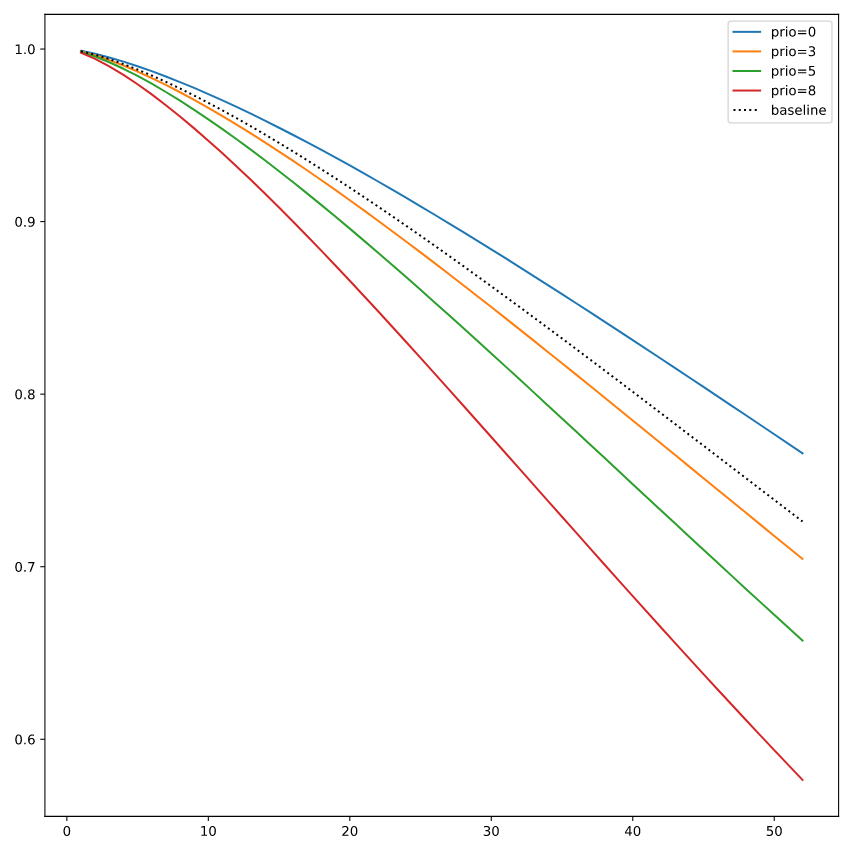

In [22]:
'''We can infer the average value of prio in the original data is beween 0 - 3'''

'We can infer the average value of prio in the original data is beween 0 - 3'

#### Predict re-arrest rate

You developed a survival regression model using covariates about each released convict, including their marital status, prior arrests, etc. Ten new convicts are about to be released, and you will use the model to predict their median time to re-arrest.

In [ ]:
# Predict median of new data
aft_pred = aft.predict_median(prison_new)

# Print average predicted time to arrest
print("On average, the median number of weeks for new released convicts to be arrested is: ", np.mean(aft_pred)) # 62.28

#### How good is the fit?

You used the Weibull model to fit the prison convict DataFrame prison. But is this the right model to use?

You will evaluate the goodness-of-fit of the model wb using the QQ plot.

In [ ]:
# Plot qq_plot of wb
qq_plot(wb)

# Display figure
plt.show()

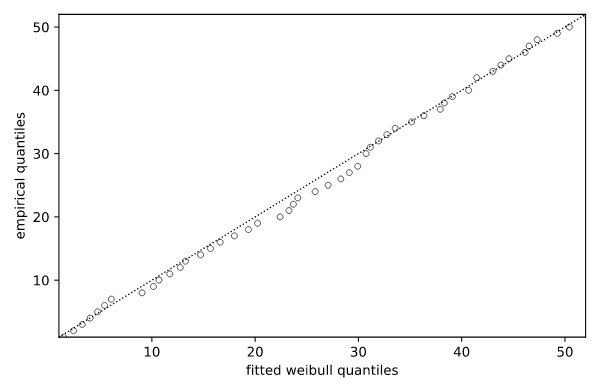

#### Choose a parametric model

Given lifelines offers a variety of parametric models, you want to find the best model for the heart patients DataFrame heart_patients.

Use the AIC score to assess the fit of each model below:

The Weibull model: WeibullFitter
The Exponential model: ExponentialFitter
The Log Normal mode: LogNormalFitter

In [ ]:
# Instantiate each fitter
wb = WeibullFitter()
exp = ExponentialFitter()
log = LogNormalFitter()

# Fit to data
for model in [wb, exp, log]:
    model.fit(heart_patients['survival'], heart_patients['observed'])

    # Print AIC
    print(model.AIC_) # 331.95194834891294 (Best one), 367.02560610624914, 334.83975916099

## The Cox Proportional Hazards model

#### Model prison data with Cox PH

The DataFrame prison contains information from 432 convicts who were released and followed up for one year after release. You have modeled their time-to-arrest and studied what factors increase or decrease their risk of re-arrest using the Weibull AFT model.

CoxPHFitter class of lifelines implements a Cox Proportional Hazards model for survival regression that models the baseline hazard function and hazard ratios that define hazard proportions. Let's try using CoxPHFitter to explore the factors!

In [ ]:
# Instantiate CoxPHFitter class cph
cph = CoxPHFitter()

# Fit cph to data
cph.fit(df=prison, duration_col="week", event_col="arrest")

# Print model summary
print(cph.summary)

In [ ]:
          coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  ...  exp(coef) upper 95%  cmp to      z      p  -log2(p)
    covariate                                                              ...                                                     
    fin       -0.366      0.694     0.191          -0.740           0.009  ...                1.009     0.0 -1.915  0.056     4.171
    age       -0.056      0.945     0.022          -0.099          -0.013  ...                0.987     0.0 -2.573  0.010     6.634
    wexp      -0.157      0.855     0.212          -0.573           0.259  ...                1.295     0.0 -0.740  0.459     1.123
    mar       -0.471      0.624     0.380          -1.217           0.274  ...                1.315     0.0 -1.239  0.215     2.216
    paro      -0.078      0.925     0.195          -0.461           0.305  ...                1.356     0.0 -0.399  0.690     0.536
    prio       0.090      1.094     0.029           0.033           0.146  ...                1.157     0.0  3.123  0.002     9.125
    
    [6 rows x 11 columns]
    
# Age and Prio are statisitcally significant at 0.05 level

#### Custom Cox PH model

You have isolated three factors that are statistically significant at the 0.05 level in the previous exercise: fin, age, and prio.

fin: if the convict received financial assistance, hazards decrease by 37%;

age: for each age older than average, hazards decrease by 5%;

prio: for each prior arrest more than average, hazards increase by 9%.

Let's build a custom Cox PH model using these covariates.

In [ ]:
# Instantiate CoxPHFitter class
custom_cph = CoxPHFitter()

# Fit custom model
custom_cph.fit(prison, 'week', 'arrest', formula = "age + fin + prio")

# Print model summary
print(custom_cph.summary)

In [ ]:
           coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  ...  exp(coef) upper 95%  cmp to      z          p  -log2(p)
    covariate                                                              ...                                                         
    age       -0.067      0.935     0.021          -0.108          -0.026  ...                0.974     0.0 -3.218  1.289e-03     9.599
    fin       -0.347      0.707     0.190          -0.720           0.026  ...                1.026     0.0 -1.824  6.820e-02     3.874
    prio       0.097      1.102     0.027           0.043           0.150  ...                1.162     0.0  3.555  3.776e-04    11.371
    
    [3 rows x 11 columns]
    
# The problem of overfitting and multicollinearity might also exist for survival regression models.

#### Cox PH model survival time

You used both the Weibull AFT model and the Cox PH model to model time-to-arrest for convicts. Using the Weibull AFT model, you estimated the impact on survival time from changes in the covariates.

Could you do the same with the Cox PH model? Fit the Cox PH model to the prison data and calculate the impact on survival time from a one unit increase in prio (number of prior arrests).

In [ ]:
# Instantiate CoxPHFitter class
cph = CoxPHFitter()

# Fit cph to data using all columns
cph.fit(df=prison, duration_col="week", event_col="arrest")

# Assign summary to summary_df
summary_df = cph.summary

# Create new column of survival time ratios
summary_df["surv_ratio"] = 1 / summary_df['exp(coef)']

# Print surv_ratio for prio
print(summary_df.loc['prio', "surv_ratio"]) #  0.9142399606473923

In [23]:
'''Time-to-arrest decreases by 8.6% with a one-unit increase in prio'''

'Time-to-arrest decreases by 8.6% with a one-unit increase in prio'

Plot covariate effects on survival
Two convicts are on the waitlist to be released. You want to predict their survival function for time-to-arrest using the CoxPHFitter model you just fitted. The covariate values for the individuals are listed below:

Name	fin	age	wexp	mar	paro	prio

Jack	0	35	0	1	1	3

Marie	1	22	0	0	0	0

Plot Jack's and Marie's survival curves side-by-side with the baseline survival curve using cph. The fitted model cph has been loaded for you.

In [ ]:
# Plot partial effects
cph.plot_partial_effects_on_outcome(covariates= ['fin', 'age', 'wexp','mar','paro','prio'],
         values = [[0,35,0,1,1,3], [1,22,0,0,0,0]])

# Show plot
plt.show()

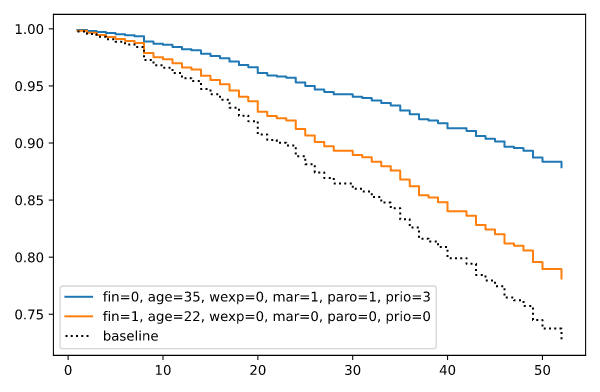

#### Test the PH assumption with KM curves

After learning about the proportional hazards assumption, you realize that the Cox PH model you built using prison DataFrame has not been tested. You will test the proportional hazards assumption for the categorical variable fin using Kaplan-Meier curves.

cph is the fitted Cox PH model using all columns, and it has been loaded. A KaplanMeierFitter class kmf has also been instantiated.

In [ ]:
# Fit to fin == 0
kmf.fit(prison[prison['fin'] == 0]['week'], prison[prison['fin'] == 0]['arrest'])

# Plot survival curve for fin == 0
ax = kmf.plot()

# Fit to fin == 1 and plot on ax
kmf.fit(durations=prison[prison["fin"] == 1]["week"], 
        event_observed=prison[prison["fin"] == 1]["arrest"])
ax = kmf.plot(ax = ax)
plt.show()

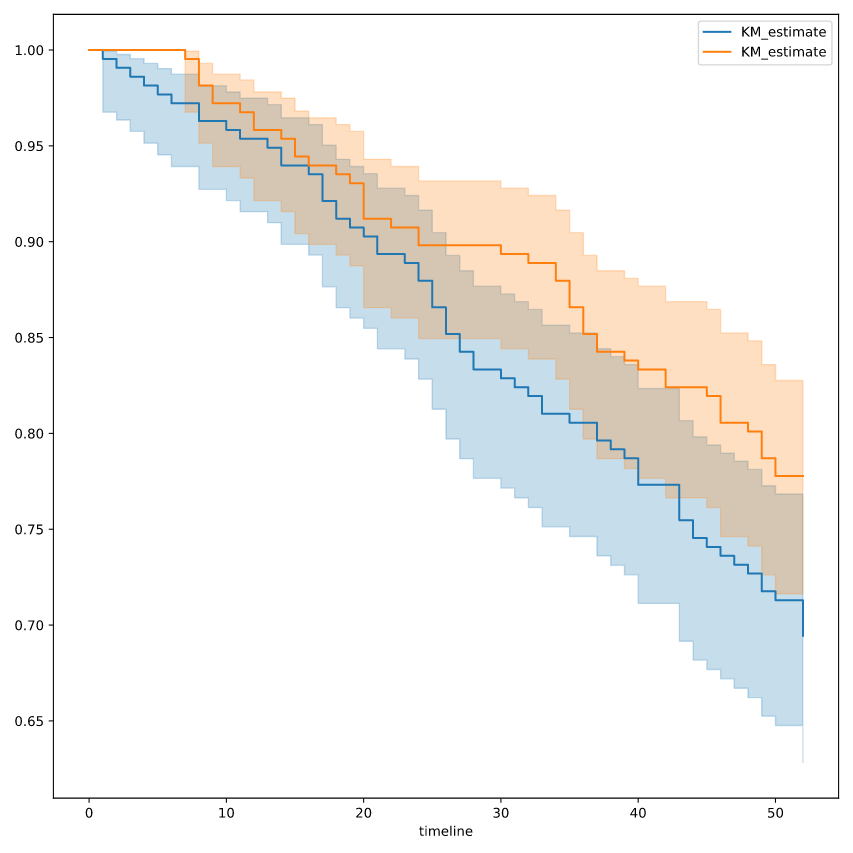

In [24]:
'''KM curves that seem parallel satisfy the proportional hazards assumption'''

'KM curves that seem parallel satisfy the proportional hazards assumption'

#### Test the PH assumption automatically

For other continuous variables in prison, you will test the proportional hazards assumption using the .check_assumptions() method.

In [ ]:
# Check PH assumption
print(cph.check_assumptions(training_df= prison, p_value_threshold= 0.1))

In [25]:
'''The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some
    covariates will be below the threshold by chance. This is compounded when there are many covariates.
    Similarly, when there are lots of observations, even minor deviances from the proportional hazard
    assumption will be flagged.
    
    With that in mind, it's best to use a combination of statistical tests and visual tests to determine
    the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``
    and looking for non-constant lines. See link [A] below for a full example.
    
    <lifelines.StatisticalResult: proportional_hazard_test>
     null_distribution = chi squared
    degrees_of_freedom = 1
                 model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>
             test_name = proportional_hazard_test
    
    ---
               test_statistic      p  -log2(p)
    age  km             11.51 <0.005     10.50
         rank           11.93 <0.005     10.83
    fin  km              0.00   0.95      0.08
         rank            0.00   0.96      0.06
    mar  km              0.78   0.38      1.41
         rank            0.90   0.34      1.54
    paro km              0.16   0.69      0.54
         rank            0.18   0.67      0.58
    prio km              0.02   0.89      0.16
         rank            0.01   0.90      0.15
    wexp km              7.86   0.01      7.63
         rank            7.70   0.01      7.50
    
    
    1. Variable 'age' failed the non-proportional test: p-value is 0.0006.
    
       Advice 1: the functional form of the variable 'age' might be incorrect. That is, there may be
    non-linear terms missing. The proportional hazard test used is very sensitive to incorrect
    functional forms. See documentation in link [D] below on how to specify a functional form.
    
       Advice 2: try binning the variable 'age' using pd.cut, and then specify it in `strata=['age',
    ...]` in the call in `.fit`. See documentation in link [B] below.
    
       Advice 3: try adding an interaction term with your time variable. See documentation in link [C]
    below.
    
    
    2. Variable 'wexp' failed the non-proportional test: p-value is 0.0050.
    
       Advice: with so few unique values (only 2), you can include `strata=['wexp', ...]` in the call in
    `.fit`. See documentation in link [E] below.
    
    ---
    [A]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html
    [B]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Bin-variable-and-stratify-on-it
    [C]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Introduce-time-varying-covariates
    [D]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Modify-the-functional-form
    [E]  https://lifelines.readthedocs.io/en/latest/jupyter_notebooks/Proportional%20hazard%20assumption.html#Stratification
    
    []'''

"The ``p_value_threshold`` is set at 0.1. Even under the null hypothesis of no violations, some\n    covariates will be below the threshold by chance. This is compounded when there are many covariates.\n    Similarly, when there are lots of observations, even minor deviances from the proportional hazard\n    assumption will be flagged.\n    \n    With that in mind, it's best to use a combination of statistical tests and visual tests to determine\n    the most serious violations. Produce visual plots using ``check_assumptions(..., show_plots=True)``\n    and looking for non-constant lines. See link [A] below for a full example.\n    \n    <lifelines.StatisticalResult: proportional_hazard_test>\n     null_distribution = chi squared\n    degrees_of_freedom = 1\n                 model = <lifelines.CoxPHFitter: fitted with 432 total observations, 318 right-censored observations>\n             test_name = proportional_hazard_test\n    \n    ---\n               test_statistic      p  -log2(p)

#### Employee churn study

Acquiring new employees as replacements incurs hiring costs and training costs. You want to predict how long current employees will stay. This exercise focuses on the first steps to prepare to make predictions.

You have a DataFrame called employees. It contains data about 1470 employees (churned and present) and how their survey answers. The survey is across the following dimensions:

environment_satisfaction

job_satisfaction

relationship_satisfaction

work_life_balance

Additionally, years_at_company means the duration employees have worked and attrition indicates if the employee has churned (1 if churn, 0 otherwise).

In [26]:
employees = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [27]:
print(employees.shape)

(1470, 35)


In [36]:
def relabel(row):
    if row['Attrition'] == 'Yes':
        return 1
    return 0

In [37]:
employees['attrition_relabeled'] = employees.apply(lambda x:relabel(x), axis = 1)
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,attrition_relabeled
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,0


In [ ]:
# Instantiate a CoxPHFitter object cph
cph = CoxPHFitter()

# Fit cph on all covariates
cph.fit(employees, 'YearsAtCompany', event_col='attrition_relabeled')

In [33]:
# Select employees that have not churned
current_employees = employees.loc[employees['Attrition'] == 'No']

# Existing durations of employees that have not churned
current_employees_last_obs = current_employees['YearsAtCompany']

print(current_employees_last_obs[:10])

1     10
3      8
4      2
5      7
6      1
7      1
8      9
9      7
10     5
11     9
Name: YearsAtCompany, dtype: int64


#### Predict before they leave!

In this exercise, you will use the variables you just created to predict how long current employees will stay.

In the previous exercise, you fitted the data to a CoxPHFitter model object called cph. You also created the following variables to use for prediction:

current_employees: DataFrame for all employees that are still present.
current_employees_last_obs: Series referring to the durations column of DataFrame current_employees.
The model object cph you just fitted the data to, DataFrame current_employees, and Series current_employees_last_obs are loaded for you. Now you can use them to help the HR department with this prediction task!


In [ ]:
# Predict survival function conditional on existing durations
cph.predict_survival_function(current_employees, conditional_after = current_employees_last_obs)

# Predict median remaining times for current employees
pred = cph.predict_median(current_employees, 
                              conditional_after=current_employees_last_obs)

# Print the smallest median remaining time
print(min(pred)) # 2.0